In [1]:
#(1)Extract reviews of any product from ecommerce website like amazon
#(2) Perform emotion mining



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#Downloading reviews 

In [5]:
oneplus_reviews=[]
import requests
from bs4 import BeautifulSoup as bs


In [6]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op 

In [7]:
oneplus_reviews = list(set(oneplus_reviews))
oneplus_reviews

['\n\n  You can also go to my youtube channel - "Curator Cast" directly where i reviewed it. There are two video now one review of 7T and another comparison with 7T Pro.Oneplus lives to the user\'s expectations once again. OP 7T is the best of OP 7 and OP 7 pro at a good price.You can also go to my Youtube channel "Curator Cast" to see the full review video.Pros-->beautiful Full HD+ Fluid AMOLED 90Hz display, for punchy colors and smooth transitions plus fluid gaming experience->Snapdragon 855+ chipset, latest in the market with the improvements of 4.2 %in CPU and 15 % in GPU over Snapdragon 855->8 GB LPDDR4X Ram in the base variant itself, means future proof and 15 % faster than previous-gen ram->128 GB UFS 3 inbuilt storage which is 2 times faster than UFS 2.1 storage found in most mobiles, which means faster copy speeds and faster app launch time->Triple camera setup with main camera being 48 MP sony IMX 586 sensor with wide aperture for good low light shots and natural background b

In [8]:
#cleaning the text

In [9]:
txt_upd = ' '.join(oneplus_reviews)
txt_upd 

'\n\n  You can also go to my youtube channel - "Curator Cast" directly where i reviewed it. There are two video now one review of 7T and another comparison with 7T Pro.Oneplus lives to the user\'s expectations once again. OP 7T is the best of OP 7 and OP 7 pro at a good price.You can also go to my Youtube channel "Curator Cast" to see the full review video.Pros-->beautiful Full HD+ Fluid AMOLED 90Hz display, for punchy colors and smooth transitions plus fluid gaming experience->Snapdragon 855+ chipset, latest in the market with the improvements of 4.2 %in CPU and 15 % in GPU over Snapdragon 855->8 GB LPDDR4X Ram in the base variant itself, means future proof and 15 % faster than previous-gen ram->128 GB UFS 3 inbuilt storage which is 2 times faster than UFS 2.1 storage found in most mobiles, which means faster copy speeds and faster app launch time->Triple camera setup with main camera being 48 MP sony IMX 586 sensor with wide aperture for good low light shots and natural background bl

In [10]:
import re 
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [11]:
text_tokens = word_tokenize(txt_upd)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()


In [13]:
text_tf = tf.fit_transform(tokens_without_sw)


In [14]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df 

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
word_list = ' '.join(df)


In [16]:
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500).generate(word_list)

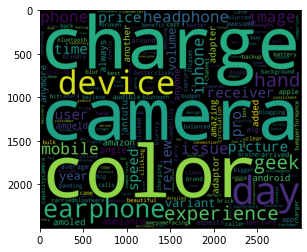

In [17]:
plt.imshow(wordcloud)


In [18]:
#emotion mining

In [19]:
with open("C:/Users/dell/New folder/negative-words.txt","r") as nw:
    negative_words = nw.read().split("\n")

In [20]:
negative_words = negative_words[35:]
negative_words 

['accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',
 'aggravating',
 'aggravation',
 'aggression',
 'aggressive',
 'aggressiveness',
 'aggressor',
 'aggrieve',
 'aggrieved',
 'aggrivation',
 'aghast',
 'agonies',
 'agonize',
 'agonizing',
 'agonizingly',
 'agony',
 'aground',
 'ail',
 'ailing',
 'ailment',
 'aimless',
 'alarm',
 'alarmed',
 'alarming',
 'alarmingly',
 'alienate',
 'alienated',
 'alienation',
 'allegation',
 'allegations',
 'allege',
 'allergic',
 'allerg

In [22]:
with open("C:/Users/dell/New folder/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [23]:
positive_words = positive_words[35:]
positive_words 

['admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordably',
 'afordable',
 'agile',
 'agilely',
 'agility',
 'agreeable',
 'agreeableness',
 'agreeably',
 'all-around',
 'alluring',
 'alluringly',
 'altruistic',
 'altruistically',
 'amaze',
 'amazed',
 'amazement',
 'amazes',
 'amazing',
 'amazingly',
 'ambitious',
 'ambitiously',
 'ameliorate',
 'amenable',
 'amenity',
 'amiability',
 'amiabily',
 'amiable',
 'amicability',
 'amicable',
 'amicably',
 'amity',
 'ample',
 'amply',
 'amuse',
 'amusing',
 'amusingly',
 'angel',
 'angelic',
 'ap

In [24]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])


In [25]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [26]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])


In [27]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

# Conclusion

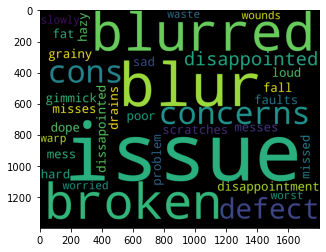

In [28]:
plt.imshow(wordcloud_neg)


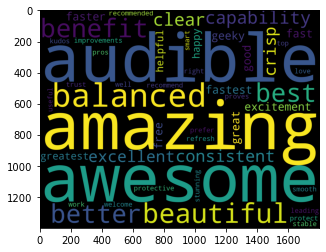

In [29]:
plt.imshow(wordcloud_pos)
